In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Multi Armed Bandit Problem

<img src="epsilongreedy.png">

In [2]:
class bandit_urn:
    #Inicialization
    # levers: integer, number of levers
    # real_distribution: list, a list containing the ground truth probability of recieving a reward respectively, in this case of observing a crime
    # observed: list, a list containing the observed probability of recieving a reward respectively 
    # observed_size: list, a list of many times has each lever been pulled respectively
    # epsilon: float, a number between 0 and 1.
    # urn_balls: list of balls asociated to each neighborhood
    # lambdas: list of likelihood of a crime happening (probability or )
    # tot_reward: int, historic reward
    def __init__(self, real_distribution, epsilon, urn_balls, tot_reward=0, cop_efficiency=2):
        self.real_distribution=real_distribution
        self.epsilon=epsilon
        self.urn_balls=urn_balls
        self.tot_reward=tot_reward
        self.cop_efficiency=cop_efficiency
        
    def total_balls(self):
        return(sum(self.urn_balls))
    
    # Calculate ratios of balls
    def ball_rates(self):
        rates=[i/self.total_balls() for i in self.urn_balls]
        return(rates)
    
    
    # The corresponding entry of the observed and observed_size lists are updated
    def update_observed(self):
        for i in range(len(self.urn_balls)):
            x=self.cop_efficiency*(self.epsilon/2+(1-self.epsilon)*self.ball_rates()[i]) 
            self.urn_balls[i]=np.tanh(x)*self.real_distribution[i]

    # Simulate N periods of Epsilon-greedy algorithm
    def N_times_e_greedy(self, periods):
        observed_history=[]
        observed_history.append(self.ball_rates())
        for i in range(periods):
            self.update_observed()
            observed_history.append(self.ball_rates())
        return(observed_history)

#### Parameters

In [12]:
#num_levers=3 # number of levers.
real=[3, 2] # real distribution of rewards.
obs=[1, 100] # observed distribution of rewards.
eps=0.01 # Probability (trade-off) of exploring instead of exploiting.
cops=2 # Cops efficiency
tot=0 # Starting reward.
N=1000 # periods of simulation.
k=100 # number of simulations

In [27]:
(eps*real[0]/2 + (1-eps)*prueba.urn_balls[0]/sum(prueba.urn_balls)*real[0])/(eps*real[0]/2 + (1-eps)*prueba.urn_balls[0]/sum(prueba.urn_balls)*real[0] + eps*real[1]/2 + (1-eps)*prueba.urn_balls[1]/sum(prueba.urn_balls)*real[1])

0.8013785891337661

In [13]:
prueba=bandit_urn(real_distribution=real, urn_balls=obs, epsilon=eps, cop_efficiency=cops)

In [6]:
prueba.ball_rates()

[0.009900990099009901, 0.9900990099009901]

In [14]:
%%time
history=prueba.N_times_e_greedy(N)

Wall time: 19.9 ms


In [8]:
dist_real=[i/sum(prueba.real_distribution) for i in prueba.real_distribution]

In [19]:
history[-1]

[0.7312957511595766, 0.2687042488404235]

In [89]:
red=[i[0] for i in history]
blue=[i[1] for i in history]
#green=[i[2] for i in history]

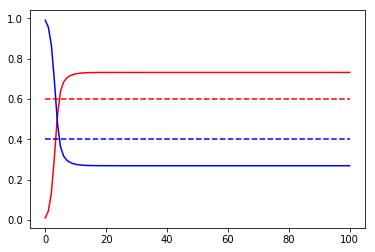

In [90]:
plt.plot(red, color='red')
plt.plot(blue, color='blue')
#plt.plot(green, color='green')

plt.plot(range(len(red)), [dist_real[0]]*len(red), color='red', linestyle='--')
plt.plot(range(len(red)), [dist_real[1]]*len(red), color='blue', linestyle='--');
#plt.plot(range(len(red)), [dist_real[2]]*len(red), color='green', linestyle='--')